In this notebook, we use Networkx to make an old-style network.

We place everyone's names on the circumference of a circle, and draw random-colored lines between them.

## Importing packages and data

In [1]:
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('clean_connections.csv')
people=pd.read_csv('registeredparticipants.csv', encoding='latin1')

## Making the graph

In [4]:
#making the edges random colors

color_options=['r', 'b','k','g','c','m','y']
colors=[]
for i in range(len(people)):
    choice=np.random.randint(0,len(color_options))
    colors.append(color_options[choice])

In [5]:
#making the edges labeled by people's names
label={}
for i in range(len(people)):
    label[i]=people.iloc[i]['first'].strip() + ' ' + people.iloc[i]['last'].strip()[0]+'.'

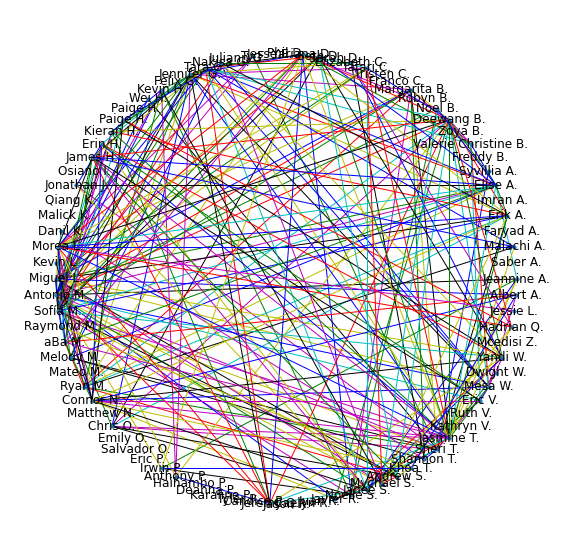

In [6]:
#making the actual graph
mine=Network(notebook=True)

#a magic number
radius=10

my_network=nx.Graph()

#drawing the connections
for i in range(len(df)):
    my_network.add_edge(df.iloc[i]['name'], df.iloc[i]['conn'])

#placing the nodes
pos={}
for i in range(len(people)):
    pos[i]= (radius*np.cos(2*np.pi*i/len(people)), radius*np.sin(2*np.pi * i/len(people)))
    
fig = plt.figure(figsize=(10,10))

    
nx.draw(my_network, 
        pos,
        node_size=10, 
        labels=label,
        edge_color=colors,
       ax=fig.add_subplot())


# .show()

In [8]:
fig.savefig("oldstyle.png")